# __Hashtags Validation__

In [1]:
import pandas as pd
from IPython.display import clear_output, display
import os, datetime
import numpy as np

In [2]:
DATA_PATH = 'data/tweets/'

week_list = [week_dir for week_dir in os.listdir(DATA_PATH) if os.path.isdir(DATA_PATH+week_dir) and not week_dir.endswith('.ipynb_checkpoints')]
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
week_list.sort()
week_list.remove('week_pr_01')
week_list.insert(week_list.index('week_12')+1, 'week_pr_01')
week_list.remove('week_pr_02')
week_list.insert(week_list.index('week_pr_01')+1, 'week_pr_02')
week_list.remove('week_pr_03')
week_list.insert(week_list.index('week_17')+1, 'week_pr_03')
week_list.remove('week_pr_04')
week_list.insert(week_list.index('week_21')+1, 'week_pr_04')

print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
user_list = []
hashtag_list = []

In [5]:
for week in week_list:
    clear_output(wait=True)
    print(f'Starting {week}:')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        usr_name = eval(tweet['user'])['username']
        hashtags = eval(tweet['hashtags'])
        if usr_name not in user_list:
            user_list.append(usr_name)
        if hashtags:
            for hashtag in hashtags:
                hashtag_list.append(hashtag.lower())
                #hasht_low = hashtag.lower()
                #if hasht_low not in hashtag_list:
                #    hashtag_list.append(hasht_low)
    print(f'''
    Finished {week}:
    Total number of users: {len(user_list)}
    Total number of hashtags: {len(hashtag_list)}
    \n
    ''')

Starting week_22:

    Finished week_22:
    Total number of users: 472852
    Total number of hashtags: 5189068
    

    


In [6]:
user_series = pd.Series(user_list)
hashtag_series = pd.Series(hashtag_list)

In [7]:
user_series.drop_duplicates(inplace=True)
len(user_series)

472852

In [8]:
user_series[:20]

0         Indignado72
1     EscutaZeNinguem
2       OSul_noticias
3          Alvesalces
4             guinody
5      ANA_PAULA_FONS
6         libolsonaro
7         Sandroka131
8           gomessamg
9           teddyfps1
10         thivagando
11    AndreaPorto2021
12          thetunnes
13    ngelomarchioll1
14     MarceloAOrtega
15     eriicksonsilva
16            Elmosol
17     sbsergiobastos
18         silviacbap
19     LuizzPatriotaa
dtype: object

In [9]:
hashtag_use_count = len(hashtag_series)
hashtag_use_count

5189068

In [10]:
#hashtag_series.value_counts()[:30]

s_counts_ = hashtag_series.value_counts()[:30]
s_perc_ = hashtag_series.value_counts(normalize=True)[:30]
print('Top 30 Hashtags')
for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
    print(f'#{idx}: {val} ({perc*100:.3f}%)')

Top 30 Hashtags
#cpidacovid: 609488 (11.746%)
#forabolsonaro: 595474 (11.476%)
#forabolsonarogenocida: 150814 (2.906%)
#cpidapandemia: 143894 (2.773%)
#renanvagabundo: 116162 (2.239%)
#cpidocirco: 111937 (2.157%)
#renansabiadetudo: 88980 (1.715%)
#29mforabolsonaro: 79676 (1.535%)
#euautorizopresidente: 79206 (1.526%)
#bolsonarogenocida: 57439 (1.107%)
#cpidotse: 56181 (1.083%)
#bolsonaropresidenteate2026: 55712 (1.074%)
#lulaladrao: 55328 (1.066%)
#3jforabolsonaro: 52604 (1.014%)
#barrosonacadeia: 51438 (0.991%)
#cpidogenocidio: 50534 (0.974%)
#euapoiovotoauditavel: 48931 (0.943%)
#covid19: 43422 (0.837%)
#cpidacovid19: 41100 (0.792%)
#aglobonaopresta: 39479 (0.761%)
#19jforabolsonaro: 38188 (0.736%)
#impeachmentbolsonarourgente: 36020 (0.694%)
#bolsonarovaicair: 34391 (0.663%)
#24jforabolsonaro: 33803 (0.651%)
#lulalivrebrasillivre: 33762 (0.651%)
#euapoiobolsonaro2022: 31651 (0.610%)
#brasil: 31304 (0.603%)
#votoimpressoauditavelja: 30653 (0.591%)
#brasilpelovotoauditavel: 29623 (0.5

In [11]:
top_30 = list(hashtag_series.value_counts()[:30].index)

In [12]:
user_hash = {}
for user in user_list:
    user_hash[user] = np.zeros(30, dtype=int)

In [13]:
for week in week_list:
    clear_output()
    print(f'Current week: {week}...')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        hashtags = eval(tweet['hashtags'])
        if hashtags:
            usr_name = eval(tweet['user'])['username']
            for hashtag in hashtags:
                hashtag_lower = hashtag.lower()
                if hashtag_lower in top_30:
                    idx = top_30.index(hashtag_lower)
                    user_hash[usr_name][idx] = user_hash[usr_name][idx] + 1
    print(f'Finished week: {week}')


Current week: week_22...
Finished week: week_22


In [14]:
columns = ['user']+top_30
columns

['user',
 'cpidacovid',
 'forabolsonaro',
 'forabolsonarogenocida',
 'cpidapandemia',
 'renanvagabundo',
 'cpidocirco',
 'renansabiadetudo',
 '29mforabolsonaro',
 'euautorizopresidente',
 'bolsonarogenocida',
 'cpidotse',
 'bolsonaropresidenteate2026',
 'lulaladrao',
 '3jforabolsonaro',
 'barrosonacadeia',
 'cpidogenocidio',
 'euapoiovotoauditavel',
 'covid19',
 'cpidacovid19',
 'aglobonaopresta',
 '19jforabolsonaro',
 'impeachmentbolsonarourgente',
 'bolsonarovaicair',
 '24jforabolsonaro',
 'lulalivrebrasillivre',
 'euapoiobolsonaro2022',
 'brasil',
 'votoimpressoauditavelja',
 'brasilpelovotoauditavel',
 'dia07vaisergigante']

In [15]:
user_hash_matrix = []

for key in list(user_hash.keys()):
    user_h = [key]+list(user_hash[key])
    user_hash_matrix.append(user_h)


In [16]:
usr_hash_df = pd.DataFrame(columns=columns, data=user_hash_matrix)

In [17]:
usr_hash_df.shape

(472852, 31)

In [18]:
usr_hash_df.head()

,user,cpidacovid,forabolsonaro,forabolsonarogenocida,cpidapandemia,renanvagabundo,cpidocirco,renansabiadetudo,29mforabolsonaro,euautorizopresidente,...,19jforabolsonaro,impeachmentbolsonarourgente,bolsonarovaicair,24jforabolsonaro,lulalivrebrasillivre,euapoiobolsonaro2022,brasil,votoimpressoauditavelja,brasilpelovotoauditavel,dia07vaisergigante
0,Indignado72,16,34,13,3,0,0,0,0,0,...,1,0,2,2,0,0,8,0,0,0
1,EscutaZeNinguem,9,12,6,2,0,0,0,6,0,...,0,2,0,0,0,0,0,0,0,0
2,OSul_noticias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
3,Alvesalces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,guinody,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
usr_hash_df.to_parquet('data/user_hashtag_matrix.parquet', index=False)

In [20]:
# neutral hashtags sets
cpidacovid = set(usr_hash_df[usr_hash_df['cpidacovid']!=0]['user'])
cpidapandemia = set(usr_hash_df[usr_hash_df['cpidapandemia']!=0]['user'])
covid19 = set(usr_hash_df[usr_hash_df['covid19']!=0]['user'])
cpidacovid19 = set(usr_hash_df[usr_hash_df['cpidacovid19']!=0]['user'])
brasil = set(usr_hash_df[usr_hash_df['brasil']!=0]['user'])

# pro government hashtags sets
renanvagabundo = set(usr_hash_df[usr_hash_df['renanvagabundo']!=0]['user'])
cpidocirco = set(usr_hash_df[usr_hash_df['cpidocirco']!=0]['user'])
renansabiadetudo = set(usr_hash_df[usr_hash_df['renansabiadetudo']!=0]['user'])
euautorizopresidente = set(usr_hash_df[usr_hash_df['euautorizopresidente']!=0]['user'])
cpidotse = set(usr_hash_df[usr_hash_df['cpidotse']!=0]['user'])
bolsonaropresidenteate2026 = set(usr_hash_df[usr_hash_df['bolsonaropresidenteate2026']!=0]['user'])

# against government hashtags sets
forabolsonaro = set(usr_hash_df[usr_hash_df['forabolsonaro']!=0]['user'])
forabolsonarogenocida = set(usr_hash_df[usr_hash_df['forabolsonarogenocida']!=0]['user'])
_29mforabolsonaro = set(usr_hash_df[usr_hash_df['29mforabolsonaro']!=0]['user'])
bolsonarogenocida = set(usr_hash_df[usr_hash_df['bolsonarogenocida']!=0]['user'])
_3jforabolsonaro = set(usr_hash_df[usr_hash_df['3jforabolsonaro']!=0]['user'])
cpidogenocidio = set(usr_hash_df[usr_hash_df['cpidogenocidio']!=0]['user'])

In [21]:
print(f'''
Neutral Hashtags

#cpidacovid: {len(cpidacovid)}
#cpidapandemia: {len(cpidapandemia)}
#covid19: {len(covid19)}
#cpidacovid19: {len(cpidacovid19)}
#brasil: {len(brasil)}

Pro Government Hashtags

#renanvagabundo: {len(renanvagabundo)}
#cpidocirco: {len(cpidocirco)}
#renansabiadetudo: {len(renansabiadetudo)}
#euautorizopresidente: {len(euautorizopresidente)}
#cpidotse: {len(cpidotse)}
#bolsonaropresidenteate2026: {len(bolsonaropresidenteate2026)}

Against Government Hastags

#forabolsonaro: {len(forabolsonaro)}
#forabolsonarogenocida: {len(forabolsonarogenocida)}
#29mforabolsonaro: {len(_29mforabolsonaro)}
#bolsonarogenocida: {len(bolsonarogenocida)}
#3jforabolsonaro: {len(_3jforabolsonaro)}
#cpidogenocidio: {len(cpidogenocidio)}
''')


Neutral Hashtags

#cpidacovid: 65393
#cpidapandemia: 26237
#covid19: 11977
#cpidacovid19: 14112
#brasil: 9763

Pro Government Hashtags

#renanvagabundo: 29442
#cpidocirco: 19793
#renansabiadetudo: 21500
#euautorizopresidente: 19512
#cpidotse: 16479
#bolsonaropresidenteate2026: 15289

Against Government Hastags

#forabolsonaro: 180706
#forabolsonarogenocida: 55246
#29mforabolsonaro: 35944
#bolsonarogenocida: 20322
#3jforabolsonaro: 13732
#cpidogenocidio: 11866



In [22]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return f'{percentage:.3f}%'

In [23]:
print(f'''
Neutral
#cpidacovid ({len(cpidacovid)}) x #covid19 ({len(covid19)}): {len(cpidacovid.intersection(covid19))}  ({percentage(len(cpidacovid.intersection(covid19)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(covid19)), len(covid19))})
#cpidacovid ({len(cpidacovid)}) x #cpidapandemia ({len(cpidapandemia)}): {len(cpidacovid.intersection(cpidapandemia))} ({percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidapandemia))})
#cpidacovid ({len(cpidacovid)}) x #brasil ({len(brasil)}): {len(cpidacovid.intersection(brasil))} ({percentage(len(cpidacovid.intersection(brasil)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(brasil)), len(brasil))})

Against CPI
#cpidocirco ({len(cpidocirco)}) x #renanvagabundo ({len(renanvagabundo)}): {len(cpidocirco.intersection(renanvagabundo))} ({percentage(len(cpidocirco.intersection(renanvagabundo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renanvagabundo)), len(renanvagabundo))})
#cpidocirco ({len(cpidocirco)}) x #renansabiadetudo ({len(renansabiadetudo)}): {len(cpidocirco.intersection(renansabiadetudo))} ({percentage(len(cpidocirco.intersection(renansabiadetudo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renansabiadetudo)), len(renansabiadetudo))})
#cpidocirco ({len(cpidocirco)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(cpidocirco.intersection(euautorizopresidente))} ({percentage(len(cpidocirco.intersection(euautorizopresidente)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(euautorizopresidente)), len(euautorizopresidente))})
#cpidocirco ({len(cpidocirco)}) x #bolsonaropresidenteate2026 ({len(bolsonaropresidenteate2026)}): {len(cpidocirco.intersection(bolsonaropresidenteate2026))} ({percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(bolsonaropresidenteate2026))})

Pro CPI
#forabolsonaro ({len(forabolsonaro)}) x #forabolsonarogenocida ({len(forabolsonarogenocida)}): {len(forabolsonaro.intersection(forabolsonarogenocida))} ({percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonaro.intersection(bolsonarogenocida))} {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(forabolsonaro.intersection(cpidogenocidio))} ({percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(cpidogenocidio))})
#forabolsonarogenocida ({len(forabolsonarogenocida)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonarogenocida.intersection(bolsonarogenocida))} ({percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(forabolsonarogenocida))} - {percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
''')


Neutral
#cpidacovid (65393) x #covid19 (11977): 3746  (5.728% - 31.277%)
#cpidacovid (65393) x #cpidapandemia (26237): 19461 (29.760% - 74.174%)
#cpidacovid (65393) x #brasil (9763): 2064 (3.156% - 21.141%)

Against CPI
#cpidocirco (19793) x #renanvagabundo (29442): 8780 (44.359% - 29.821%)
#cpidocirco (19793) x #renansabiadetudo (21500): 6252 (31.587% - 29.079%)
#cpidocirco (19793) x #euautorizopresidente (19512): 5099 (25.762% - 26.133%)
#cpidocirco (19793) x #bolsonaropresidenteate2026 (15289): 5414 (27.353% - 35.411%)

Pro CPI
#forabolsonaro (180706) x #forabolsonarogenocida (55246): 37506 (20.755% - 67.889%)
#forabolsonaro (180706) x #bolsonarogenocida (20322): 14785 8.182% - 72.754%)
#forabolsonaro (180706) x #cpidogenocidio (11866): 7248 (4.011% - 61.082%)
#forabolsonarogenocida (55246) x #bolsonarogenocida (20322): 8583 (15.536% - 42.235%)



In [24]:
print(f'''
Pro x Against
#forabolsonaro ({len(forabolsonaro)}) x #cpidocirco ({len(cpidocirco)}): {len(forabolsonaro.intersection(cpidocirco))}
#forabolsonaro ({len(forabolsonaro)}) x #renanvagabundo ({len(cpidocirco)}): {len(forabolsonaro.intersection(renanvagabundo))}
#forabolsonaro ({len(forabolsonaro)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(forabolsonaro.intersection(euautorizopresidente))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #cpidocirco ({len(cpidocirco)}): {len(bolsonarogenocida.intersection(cpidocirco))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #renanvagabundo({len(renanvagabundo)}): {len(bolsonarogenocida.intersection(renanvagabundo))}
#cpidogenocidio ({len(cpidogenocidio)}) x #cpidocirco({len(cpidocirco)}): {len(cpidogenocidio.intersection(cpidocirco))}
''')


Pro x Against
#forabolsonaro (180706) x #cpidocirco (19793): 1189
#forabolsonaro (180706) x #renanvagabundo (19793): 546
#forabolsonaro (180706) x #euautorizopresidente (19512): 1199
#bolsonarogenocida (20322) x #cpidocirco (19793): 449
#bolsonarogenocida (20322) x #renanvagabundo(29442): 156
#cpidogenocidio (11866) x #cpidocirco(19793): 883



In [25]:
print(f'''
Neutral x Against and Pro
#cpidacovid ({len(cpidacovid)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(cpidacovid.intersection(cpidogenocidio))}
#cpidacovid ({len(cpidacovid)}) x #cpidocirco ({len(cpidocirco)}): {len(cpidacovid.intersection(cpidocirco))}
#brasil ({len(brasil)}) x #forabolsonaro ({len(forabolsonaro)}): {len(brasil.intersection(forabolsonaro))}
#brasil ({len(brasil)}) x #cpidocirco ({len(cpidocirco)}): {len(brasil.intersection(cpidocirco))}
#covid19 ({len(covid19)}) x #forabolsonaro ({len(forabolsonaro)}): {len(covid19.intersection(forabolsonaro))}
#covid19 ({len(covid19)}) x #cpidocirco ({len(cpidocirco)}): {len(covid19.intersection(cpidocirco))}
''')


Neutral x Against and Pro
#cpidacovid (65393) x #cpidogenocidio (11866): 9540
#cpidacovid (65393) x #cpidocirco (19793): 4437
#brasil (9763) x #forabolsonaro (180706): 2574
#brasil (9763) x #cpidocirco (19793): 640
#covid19 (11977) x #forabolsonaro (180706): 3692
#covid19 (11977) x #cpidocirco (19793): 666



## __User hashtag usage__

In [1]:
import pandas as pd
import matplotlib as pl

In [2]:
df = pd.read_parquet('data/user_hashtag_matrix.parquet')
df.shape

(472852, 31)

In [3]:
neutral_hashtags = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19']
agt_cpi_hashtags = ['renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente']
pro_cpi_hashtags = ['forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']
selected_hashtags = neutral_hashtags+agt_cpi_hashtags+pro_cpi_hashtags
print(selected_hashtags)

['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']


In [4]:
selected_df = df[['user']+selected_hashtags]
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
263591,pedromolthor,0,0,0,0,0,0,0,0,0,0,0,0
438518,Wagner_Leal,0,0,0,0,0,0,0,0,0,0,0,0
150698,DiegoCaiaffo,0,0,0,0,0,0,0,0,0,0,0,0
440138,LuizaGo26083167,0,0,0,0,0,0,0,0,1,0,0,0
407220,eu_vitoriia,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
ht_sum = []
for idx, row in selected_df.iterrows():
    ht_sum.append(sum(row[selected_hashtags].values))

In [6]:
selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)

/tmp/ipykernel_19131/2120302817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)


In [7]:
selected_df.sample()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
206326,gothxue,0,0,0,0,0,0,0,0,1,0,0,0,1


In [8]:
selected_df = selected_df[selected_df['hashtag_usage_amount']!=0]
selected_df.shape

(301465, 14)

In [9]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
102049,BiraPavuna,0,0,0,0,1,2,0,0,0,0,0,0,3
136028,fabsssigbo,1,0,0,0,0,0,0,0,0,0,0,0,1
92014,luizzzle,1,0,0,0,0,0,0,0,1,0,0,0,2
62993,MaressinhaM,0,0,0,0,0,0,0,0,1,0,0,0,1
132780,_MillyRDS_,1,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
selected_df['hashtag_usage_amount'].max()

29571

In [11]:
selected_df[selected_df['hashtag_usage_amount']==29571]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571


In [12]:
selected_df[selected_df['hashtag_usage_amount']>500]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571
71,MarivoneLula,637,7,1,2,0,0,0,1,69,59,145,31,952
95,tppereir,100,7,2,1,0,0,0,0,128,40,307,2,587
126,eliel_almeida,193,89,52,20,0,0,0,1,75,102,79,22,633
147,_gabge,188,14,371,0,0,0,0,0,0,0,0,0,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279053,crocogay,561,0,0,0,0,0,0,0,1,0,0,0,562
292484,fabianadirce,260,0,0,36,0,0,0,0,290,3,0,0,589
317800,desbocadadobar,489,81,0,19,0,1,0,0,22,11,0,2,625
326320,matosra,0,0,0,0,0,0,0,0,918,2,0,0,920


In [13]:
selected_df = selected_df.reset_index().drop(["index"], axis=1)

In [14]:
neutral_amount = []
a_cpi_amount = []
p_cpi_amount = []

for idx, row in selected_df.iterrows():
    neutral_amount.append(sum(row[neutral_hashtags].values))
    a_cpi_amount.append(sum(row[agt_cpi_hashtags].values))
    p_cpi_amount.append(sum(row[pro_cpi_hashtags].values))

In [15]:
selected_df['neutral_amount'] = neutral_amount
selected_df['agnst_cpi_amount'] = a_cpi_amount
selected_df['pro_cpi_amount'] = p_cpi_amount

In [16]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount
133856,CEOBotsNCrawler,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
108331,Helenisejusttin,3,0,0,0,0,0,0,0,49,3,0,0,55,3,0,52
125528,_geanlluca,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
840,ammcsalles2,0,0,0,0,11,0,4,0,0,0,0,0,15,0,15,0
37742,wanderson4782,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [17]:
prop_neutral = []
prop_agnst = []
prop_pro = []

for idx, row in selected_df.iterrows():
    prop_neutral.append(row['neutral_amount']/row['hashtag_usage_amount'])
    prop_agnst.append(row['agnst_cpi_amount']/row['hashtag_usage_amount'])
    prop_pro.append(row['pro_cpi_amount']/row['hashtag_usage_amount'])

In [18]:
selected_df['prop_neutral'] = prop_neutral
selected_df['prop_agnst'] = prop_agnst
selected_df['prop_pro'] = prop_pro

In [19]:
selected_df.sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro
152862,TulioMagalhaes4,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.000000,0.000000,0.000000
163426,timeforgina,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1.000000,0.000000,0.000000
177236,MiaMia92013587,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.000000,1.000000
107732,bocco_pat,2,0,0,0,0,0,0,0,1,0,0,0,3,2,0,1,0.666667,0.000000,0.333333
185442,amandagnogueira,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.000000,1.000000
263161,IaePamPam,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,2,0.000000,0.000000,1.000000
145978,billimybaby,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.000000,1.000000
35444,EGOdeLUHs,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.000000,0.000000,1.000000
28135,laura14153472,0,0,0,0,0,0,0,1,1,3,1,0,6,0,1,5,0.000000,0.166667,0.833333
230603,Fael618,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.000000,0.000000,1.000000


<AxesSubplot:>

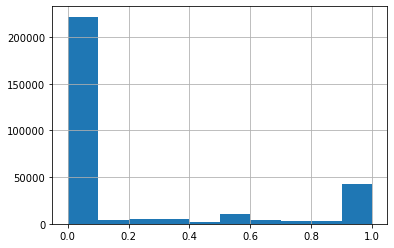

In [20]:
selected_df['prop_neutral'].hist()

<AxesSubplot:>

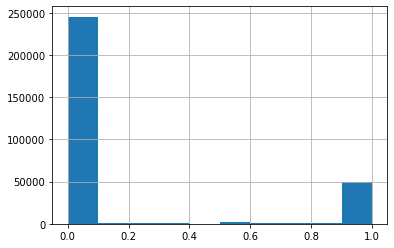

In [21]:
selected_df['prop_agnst'].hist()

<AxesSubplot:>

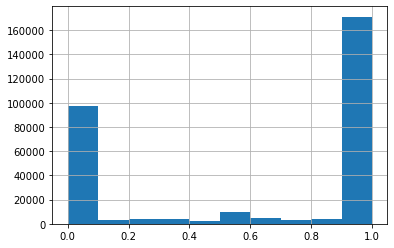

In [22]:
selected_df['prop_pro'].hist()

In [23]:
def get_interval(p_1, p0, p1):
    return (-(p_1)+p0+p1)+(0-p0)

def define_faction(i_val):
    faction = None
    if -0.3 <= i_val <= 0.3:
        faction = 'neutral'
    elif i_val > 0.3:
        faction = 'against gov'
    elif i_val < -0.3:
        faction = 'pro gov'
    return faction

In [24]:
interval_values = []

for idx, row in selected_df.iterrows():
    faction_interval_val = get_interval(row['prop_agnst'], row['prop_neutral'], row['prop_pro'])
    interval_values.append(faction_interval_val)

selected_df['faction_interval_value'] = interval_values

In [25]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].sample(10)

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
88884,0,0,1,0.0,0.0,1.0,1.0
246072,0,0,2,0.0,0.0,1.0,1.0
162899,0,0,1,0.0,0.0,1.0,1.0
121007,0,0,2,0.0,0.0,1.0,1.0
256251,0,0,2,0.0,0.0,1.0,1.0
106496,0,0,1,0.0,0.0,1.0,1.0
186411,0,0,1,0.0,0.0,1.0,1.0
278901,0,0,1,0.0,0.0,1.0,1.0
164108,0,0,1,0.0,0.0,1.0,1.0
208625,0,1,0,0.0,1.0,0.0,-1.0


In [26]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[53358]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
53358,50,0,18,0.735294,0.0,0.264706,0.264706


In [27]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[44935]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
44935,74,1,11,0.860465,0.011628,0.127907,0.116279


In [28]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[16419]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
16419,36,0,27,0.571429,0.0,0.428571,0.428571


In [29]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].query('faction_interval_value < 0').sample(20)

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
54230,0,1,0,0.0,1.0,0.0,-1.0
25561,0,25,0,0.0,1.0,0.0,-1.0
33012,0,36,0,0.0,1.0,0.0,-1.0
218547,0,1,0,0.0,1.0,0.0,-1.0
97164,0,2,0,0.0,1.0,0.0,-1.0
293318,0,1,0,0.0,1.0,0.0,-1.0
24784,0,7,0,0.0,1.0,0.0,-1.0
30513,0,5,0,0.0,1.0,0.0,-1.0
191190,0,1,0,0.0,1.0,0.0,-1.0
33475,0,1,0,0.0,1.0,0.0,-1.0


In [30]:
selected_df['faction'] = selected_df['faction_interval_value'].map(lambda x: define_faction(x))

In [31]:
selected_df.query('faction == "neutral"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
31,andrezamatais,16,0,0,0,0,0,0,0,0,...,0,16,16,0,0,1.000000,0.0,0.000000,0.000000,neutral
34,CHCadinha,117,88,5,0,0,0,0,0,8,...,19,242,210,0,32,0.867769,0.0,0.132231,0.132231,neutral
44,alinelua,17,42,0,1,0,0,0,0,3,...,7,75,60,0,15,0.800000,0.0,0.200000,0.200000,neutral
75,correio,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,1.000000,0.0,0.000000,0.000000,neutral
82,Doce_Vicio,4,2,0,0,0,0,0,0,1,...,1,8,6,0,2,0.750000,0.0,0.250000,0.250000,neutral


In [32]:
selected_df.query('faction == "pro gov"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
3,ANA_PAULA_FONS,0,0,0,0,69,0,56,31,0,...,0,156,0,156,0,0.0,1.0,0.0,-1.0,pro gov
4,libolsonaro,0,0,0,0,1,0,10,5,0,...,0,16,0,16,0,0.0,1.0,0.0,-1.0,pro gov
6,gomessamg,0,0,0,0,0,0,7,42,0,...,0,49,0,49,0,0.0,1.0,0.0,-1.0,pro gov
10,ngelomarchioll1,0,0,0,0,109,142,2,0,0,...,0,253,0,253,0,0.0,1.0,0.0,-1.0,pro gov
11,Elmosol,0,0,0,0,1,0,1,0,0,...,0,2,0,2,0,0.0,1.0,0.0,-1.0,pro gov


In [33]:
selected_df.query('faction == "against gov"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
0,Indignado72,16,3,3,0,0,0,0,0,34,...,0,91,22,0,69,0.241758,0.0,0.758242,0.758242,against gov
1,EscutaZeNinguem,9,2,0,0,0,0,0,0,12,...,0,59,11,0,48,0.186441,0.0,0.813559,0.813559,against gov
2,guinody,0,0,0,0,0,0,0,0,0,...,0,11,0,0,11,0.000000,0.0,1.000000,1.000000,against gov
5,Sandroka131,195,1,0,0,0,0,0,0,79,...,0,288,196,0,92,0.680556,0.0,0.319444,0.319444,against gov
7,thivagando,1,0,0,0,0,0,0,0,3,...,1,7,1,0,6,0.142857,0.0,0.857143,0.857143,against gov


In [34]:
user_cluster = pd.read_parquet('data/user_cluster_result.parquet')
user_cluster.shape

(167896, 3)

In [35]:
selected_df.shape

(301465, 22)

In [36]:
user_cluster.head(5)

,user,description,cluster
0,thetunnes,bandeira brasil jogador valorant simbolo raiva...,0
1,eriicksonsilva,br falo merda vascodagama manutd okcthunder,0
2,DarlyMenconi,obody wins unless everybody wins psicologa bor...,0
3,danconservador,anti comunista bandeira brasil bandeira nunca ...,1
4,SuperTorresmo,astrofisico,0


In [37]:
common_users = []

for idx, row in user_cluster.iterrows():
    if row['user'] in list(selected_df['user'].values):
        common_users.append(row['user'])

In [38]:
print(f'''
Number of users in Cluster Result df: {user_cluster.shape[0]}
Number of users in Selected Hashtags df: {selected_df.shape[0]}
Number of common users among both dfs: {len(common_users)}
''')


Number of users in Cluster Result df: 167896
Number of users in Selected Hashtags df: 301465
Number of common users among both dfs: 111920



In [39]:
user_cluster['cluster'].value_counts()

0    158669
1      9227
Name: cluster, dtype: int64

In [40]:
selected_df['faction'].value_counts()

against gov    197036
pro gov         53948
neutral         50481
Name: faction, dtype: int64

In [41]:
pro_gov_hash = set(selected_df.query("faction == 'pro gov'")['user'].values)
pro_gov_cluster = set(user_cluster.query("cluster == 1")['user'].values)

In [42]:
len(pro_gov_hash.intersection(pro_gov_cluster))

4319

In [73]:
selected_df.head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
0,Indignado72,16,3,3,0,0,0,0,0,34,...,0,91,22,0,69,0.241758,0.0,0.758242,0.758242,against gov
1,EscutaZeNinguem,9,2,0,0,0,0,0,0,12,...,0,59,11,0,48,0.186441,0.0,0.813559,0.813559,against gov
2,guinody,0,0,0,0,0,0,0,0,0,...,0,11,0,0,11,0.000000,0.0,1.000000,1.000000,against gov
3,ANA_PAULA_FONS,0,0,0,0,69,0,56,31,0,...,0,156,0,156,0,0.000000,1.0,0.000000,-1.000000,pro gov
4,libolsonaro,0,0,0,0,1,0,10,5,0,...,0,16,0,16,0,0.000000,1.0,0.000000,-1.000000,pro gov


In [100]:
selected_hashtags_list = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo',
                        'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro',
                        'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']

temp_df = selected_df[selected_hashtags_list]

In [101]:
temp_df = temp_df.applymap(lambda x: True if x>0 else False)
temp_df['id'] = selected_df['user']
temp_df.head()

,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,id
0,True,True,True,False,False,False,False,False,True,True,True,False,Indignado72
1,True,True,False,False,False,False,False,False,True,True,True,False,EscutaZeNinguem
2,False,False,False,False,False,False,False,False,False,False,True,False,guinody
3,False,False,False,False,True,False,True,True,False,False,False,False,ANA_PAULA_FONS
4,False,False,False,False,True,False,True,True,False,False,False,False,libolsonaro


In [136]:
from upsetplot import from_contents, UpSet

In [156]:
temp_df.shape

(301465, 13)

In [160]:
data = {}

for hashtag in selected_hashtags_list:
    data[hashtag] = []

for idx, row in temp_df.iterrows():
    for hashtag in selected_hashtags_list:
        if temp_df[hashtag][idx]:
            data[hashtag].append(temp_df['id'][idx])

In [161]:
data.keys()

dict_keys(['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio'])

In [162]:
print(data['cpidacovid'][:10])

['Indignado72', 'EscutaZeNinguem', 'Sandroka131', 'thivagando', 'AndreaPorto2021', 'silviacbap', 'DarlyMenconi', 'flintes', 'NaTransversal', 'ptribeirao']


In [164]:
data_plot = from_contents(data)
data_plot.head()

id
cpidacovid cpidapandemia covid19 cpidacovid19 renanvagabundo cpidocirco renansabiadetudo euautorizopresidente forabolsonaro forabolsonarogenocida bolsonarogenocida cpidogenocidio                 
True       True          True    False        False          False      False            False                True          True                  True              False               Indignado72
                         False   False        False          False      False            False                True          True                  True              False           EscutaZeNinguem
                                                                                                                                                                    False               Sandroka131
           False         False   False        False          False      False            False                True          False                 True              True                 thivagando
           True          True    True         False          False      False            False                True          True                  True              True            AndreaPorto2021

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

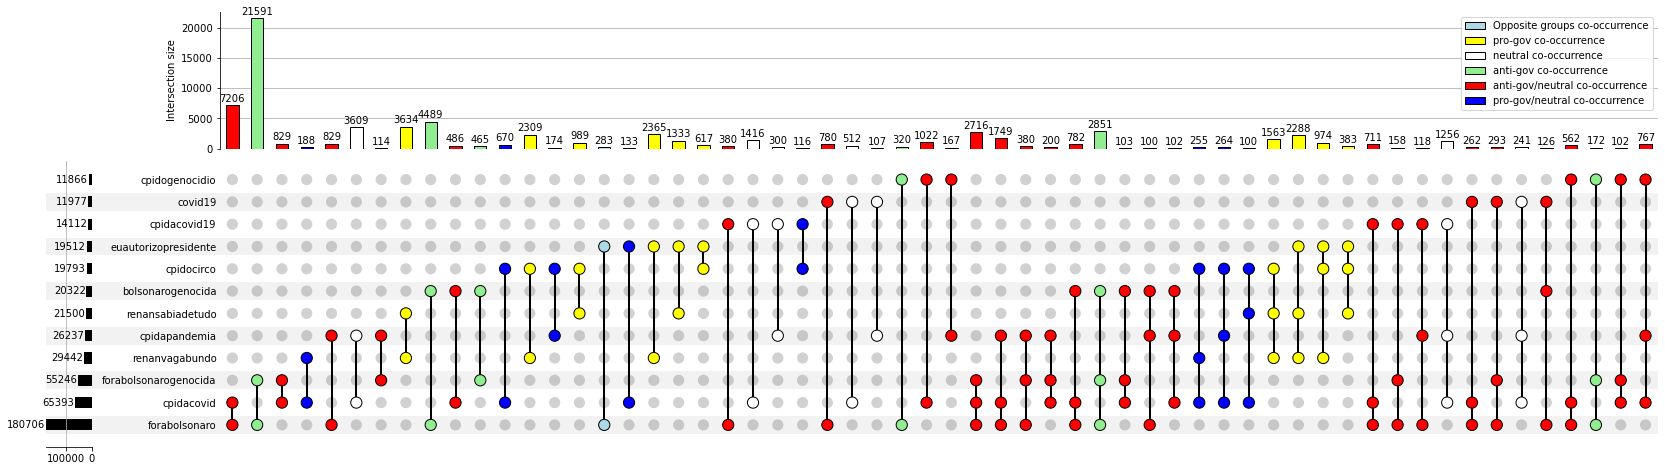

In [296]:
upset = UpSet(data_plot, min_subset_size=100, show_counts=True, max_degree=3, min_degree=2)

upset.style_subsets(present=['euautorizopresidente', 'forabolsonaro'], facecolor='lightblue', edgecolor='black', label='Opposite groups co-occurrence')

upset.style_subsets(present=['renanvagabundo', 'cpidocirco'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')
upset.style_subsets(present=['renanvagabundo', 'renansabiadetudo'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')
upset.style_subsets(present=['renanvagabundo', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')
upset.style_subsets(present=['cpidocirco', 'renansabiadetudo'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')
upset.style_subsets(present=['cpidocirco', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')
upset.style_subsets(present=['renansabiadetudo', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='pro-gov co-occurrence')

upset.style_subsets(present=['cpidacovid', 'cpidapandemia'], facecolor='white', edgecolor='black', label='neutral co-occurrence')
upset.style_subsets(present=['cpidacovid', 'covid19'], facecolor='white', edgecolor='black', label='neutral co-occurrence')
upset.style_subsets(present=['cpidacovid', 'cpidacovid19'], facecolor='white', edgecolor='black', label='neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'covid19'], facecolor='white', edgecolor='black', label='neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'cpidacovid19'], facecolor='white', edgecolor='black', label='neutral co-occurrence')
upset.style_subsets(present=['covid19', 'cpidacovid19'], facecolor='white', edgecolor='black', label='neutral co-occurrence')

upset.style_subsets(present=['forabolsonaro', 'forabolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')
upset.style_subsets(present=['forabolsonaro', 'bolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')
upset.style_subsets(present=['forabolsonaro', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'bolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')
upset.style_subsets(present=['bolsonarogenocida', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='anti-gov co-occurrence')


upset.style_subsets(present=['cpidacovid', 'forabolsonaro'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidacovid'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidapandemia'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['bolsonarogenocida', 'cpidacovid'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'forabolsonaro'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidacovid19', 'forabolsonaro'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidogenocidio', 'cpidacovid'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidogenocidio', 'cpidapandemia'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')
upset.style_subsets(present=['covid19', 'forabolsonaro'], facecolor='red', edgecolor='black', label='anti-gov/neutral co-occurrence')




upset.style_subsets(present=['renanvagabundo', 'cpidacovid'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'cpidacovid'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'cpidapandemia'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'covid19'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')
upset.style_subsets(present=['euautorizopresidente', 'cpidacovid'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')
upset.style_subsets(present=['cpidacovid19', 'cpidocirco'], facecolor='blue', edgecolor='black', label='pro-gov/neutral co-occurrence')



upset.plot()

<AxesSubplot:>

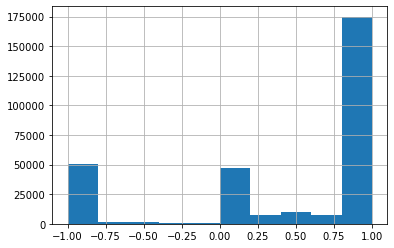

In [323]:
selected_df['faction_interval_value'].hist()

In [321]:
print(f'''
Number of neutral users: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='neutral'].shape[0]}
Number of users opposite to gov: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='against gov'].shape[0]}
Number of users pro gov: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='pro gov'].shape[0]}
''')


Number of neutral users: 50481
Number of users opposite to gov: 197036
Number of users pro gov: 53948



In [326]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='neutral'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
97051,rickdeaquario,1,0,0,0,0,0,0,0,0,0,0,0
153533,Anarckellos,0,0,1,1,0,0,0,0,0,0,0,0
61275,fifooooo,1,0,0,0,0,0,0,0,0,0,0,0
38287,samiamart,7,4,0,0,0,0,0,0,0,0,0,1
97795,mdegascouto,1,0,0,0,0,0,0,0,0,0,0,0
85465,luizcavalinijr,4,1,0,2,0,0,0,0,1,0,0,0
142351,rena_cp,6,0,0,0,0,0,0,0,0,1,0,0
245454,TerraElisio,1,0,0,0,0,0,0,0,0,0,0,0
63499,renataingrata91,2,1,0,0,0,0,0,0,0,0,0,0
163548,marinocentrismo,1,0,0,0,0,0,0,0,0,0,0,0


In [317]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='against gov'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
119101,casadarai,0,0,0,0,0,0,0,0,2,0,0,0
238169,mcareigoto,0,0,0,0,0,0,0,0,1,0,0,0
249381,Astorcarvalho,0,0,0,0,0,0,0,0,1,0,0,0
46964,julianababr,2,0,0,0,0,0,0,0,4,0,1,0
165124,rafaelacg7,0,0,0,0,0,0,0,0,2,1,0,0
250494,duddasp_,0,0,0,0,0,0,0,0,1,0,0,0
217617,Cris_PedrosoM,0,0,0,0,0,0,0,0,1,0,0,0
178069,_euoigo,0,0,0,0,0,0,0,0,0,1,0,0
171894,EleiseDe,0,0,0,0,0,0,0,0,2,0,0,0
276634,GilbertoJorge4,0,0,0,0,0,0,0,0,1,0,0,0


In [318]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='pro gov'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
3740,fabriciomalto,0,0,0,0,2,0,1,0,0,0,0,0
234692,DiegoDigfarias,0,0,0,0,0,1,0,0,0,0,0,0
220648,Jhonny22040118,0,0,0,0,0,1,0,0,0,0,0,0
29096,bolso_miriam,0,0,0,0,6,1,10,4,0,0,0,0
31140,Maynard77131505,0,0,0,0,0,0,0,2,0,0,0,0
210533,evandroalima,0,0,0,0,0,0,1,0,0,0,0,0
210110,Ka_2222220,0,0,0,0,0,0,1,0,0,0,0,0
33612,Carvalho784,0,0,0,0,0,0,0,1,0,0,0,0
76415,JMindelis,0,0,0,0,2,0,0,0,0,0,0,0
31883,CristianoQuare3,0,0,0,0,0,0,0,1,0,0,0,0


In [415]:
edges_df = pd.read_parquet('data/networks/complete_network_edges.parquet')

edges_df.shape

(1895008, 4)

In [419]:
edges_df.sample(5)

,Source,Target,LinkType,TweetContent
1318262,Angeli20756515,juliovschneider,reply,@juliovschneider Os verdadeiros genocidas #STF...
355756,FrancescaFrei10,MariaLuizaFasa1,quoted_rt,O senado está podre e precisa ser sanitizado n...
1723515,Lan_Torres,Estadao,reply,@Estadao @EstadaoPolitica Só querem #forabolso...
1760186,Markimmatos,NandaPagibe,reply,@NandaPagibe @UOLNoticias A verdade é que deve...
1372077,RosaJordo1,Fabiano69457389,reply,"@Fabiano69457389 Chora não! hj foi gigante, as..."


<AxesSubplot:>

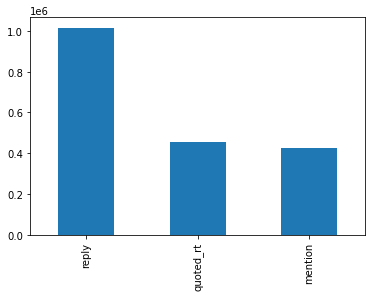

In [353]:
edges_df['LinkType'].value_counts().plot.bar()

In [382]:
selected_groups_interac = []
user_faction_dict = {}

#df to dict
for idx, row in selected_df.iterrows():
    user_faction_dict[row['user']] = row['faction']


for idx, row in edges_df.iterrows():
    if row['Source'] in user_faction_dict.keys() and row['Target'] in user_faction_dict.keys():
        source_faction = user_faction_dict[row['Source']]
        target_faction = user_faction_dict[row['Target']]
        selected_groups_interac.append((row['Source'], row['Target'], f'{source_faction} to {target_faction}', row['LinkType'], row['TweetContent']))

groups_interac_df = pd.DataFrame(columns=['source', 'target', 'factions', 'interac_type','tweet_content'], data=selected_groups_interac)
groups_interac_df.shape

(1272586, 5)

In [387]:
groups_interac_df.sample(10)

,source,target,factions,interac_type,tweet_content
688384,Pattypschmidt,kimpaim,pro gov to pro gov,quoted_rt,Ahh cadê a PF e o PGR @MPF_PGR #RenanSabiaDeTu...
1252190,FalaBa7,NinjaEsporte,neutral to against gov,quoted_rt,Carol entre na minha casa e me coma ❤️ mulher ...
182504,DrBoTS2,nirdop,pro gov to pro gov,mention,---\nMPF envia à CPI da Covid gastos de Renan ...
466986,VivianeMaia2323,OGloboPolitica,against gov to neutral,reply,@OGloboPolitica @jairbolsonaro Gastando dinhei...
464378,JehDug,MarioMacjunior,against gov to against gov,reply,@MarioMacjunior Ainda teve meia dúzia que teve...
910896,SniaSan06304516,GalizaAr,pro gov to pro gov,quoted_rt,"O cala a boca já morreu,quem manda na minha bo..."
1245059,leox2233,FCPapoDPolitica,neutral to neutral,mention,Um dos depoimentos mais tristes da CPI.\nUm mé...
628781,ZelmaLCavalcant,Helektra6,against gov to against gov,reply,@Helektra6 @EmbaixadaChina @RicocheteBlues Não...
959665,CleireCarioca,taoquei1,pro gov to pro gov,reply,"@taoquei1 Que o Omar é 1 canalha, não há dúvid..."
819425,MarleneMartinsS,bielconn,pro gov to pro gov,reply,@bielconn @DomBaruque Eu tb #CagueiParaCpi


In [398]:
def percentage(v1, v2):
    quotient = v1/v2
    percent = quotient*100
    return f'{percent:.2f}%'

In [399]:
groups_interac_df['factions'].value_counts()

pro gov to pro gov            420024
against gov to against gov    233985
against gov to neutral        210992
pro gov to neutral            150756
neutral to neutral            128118
pro gov to against gov         45385
against gov to pro gov         36404
neutral to against gov         36088
neutral to pro gov             10834
Name: factions, dtype: int64

In [400]:
total = sum(groups_interac_df['factions'].value_counts().values)
print(total)

1272586


In [406]:
print(f'''
Pro-Gov to Pro-Gov: 420,024 ({percentage(420024, total)})
Anti-Gov to Anti-Gov: 233,985 ({percentage(233985, total)})
Anti-Gov to Neutral: 210,992 ({percentage(210922, total)})
Pro-Gov to Neutral-Gov: 150,756 ({percentage(150756, total)})
Neutral to Neutral: 128,118 ({percentage(128118, total)})
Pro-Gov to Ani-Gov: 45,385 ({percentage(45385, total)})
Anti-Gov to Pro-Gov: 36,404 ({percentage(36404, total)})
Neutral to Anti-Gov: 36,088 ({percentage(36088, total)})
Neutral to Pro-Gov: 10,834 ({percentage(10834, total)})
''')


Pro-Gov to Pro-Gov: 420,024 (33.01%)
Anti-Gov to Anti-Gov: 233,985 (18.39%)
Anti-Gov to Neutral: 210,992 (16.57%)
Pro-Gov to Neutral-Gov: 150,756 (11.85%)
Neutral to Neutral: 128,118 (10.07%)
Pro-Gov to Ani-Gov: 45,385 (3.57%)
Anti-Gov to Pro-Gov: 36,404 (2.86%)
Neutral to Anti-Gov: 36,088 (2.84%)
Neutral to Pro-Gov: 10,834 (0.85%)



In [407]:
groups_interac_df.to_parquet('data/networks/complete_group_insteracs.parquet', index=False)

In [414]:
pd.DataFrame(columns=['Id', 'Faction'], data=selected_df[['user', 'faction']].values).to_csv('data/networks/nodes_with_faction.csv', index=False)